In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from etl.extractor import S3Extractor

In [3]:
BUCKET = "assessment-86fc5eb8"
KEY = "raw-data/data.csv"
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
extractor = S3Extractor(bucket_name=BUCKET, s3_key=KEY)
df = extractor.extract_csv()
df.to_csv("../data/data.csv", index=False)

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:etl.extractor:Descargando archivo desde s3://assessment-86fc5eb8/raw-data/data.csv
INFO:etl.extractor:Datos cargados exitosamente. 8920934 filas, 5 columnas.


In [5]:
df.head()

,fecha_compra,usuario,producto,cantidad,precio
0,2014-10-01,6cba0c,PROD-efd583,2,164.7
1,2014-10-01,6cba0c,PROD-a726f5,2,164.7
2,2014-10-01,6cba0c,PROD-3e1cd9,2,164.7
3,2014-10-01,6cba0c,PROD-d012c0,2,164.7
4,2014-10-01,6cba0c,PROD-48924a,3,164.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920934 entries, 0 to 8920933
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   fecha_compra  object 
 1   usuario       object 
 2   producto      object 
 3   cantidad      int64  
 4   precio        float64
dtypes: float64(1), int64(1), object(3)
memory usage: 340.3+ MB


In [7]:
df.describe()

,cantidad,precio
count,8.920934e+06,8.920934e+06
mean,2.092597e+00,3.216595e+02
std,2.105219e+00,3.584712e+02
min,1.000000e+00,1.000000e-03
25%,2.000000e+00,8.062325e+01
50%,2.000000e+00,2.042210e+02
75%,2.000000e+00,4.387410e+02
max,2.401000e+03,9.881445e+03


In [ ]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df["fecha_compra"] = pd.to_datetime(df["fecha_compra"])
df["cantidad"] = pd.to_numeric(df["cantidad"], errors="coerce").fillna(0)

Text(0.5, 1.0, 'Top 10 clientes con más compras')

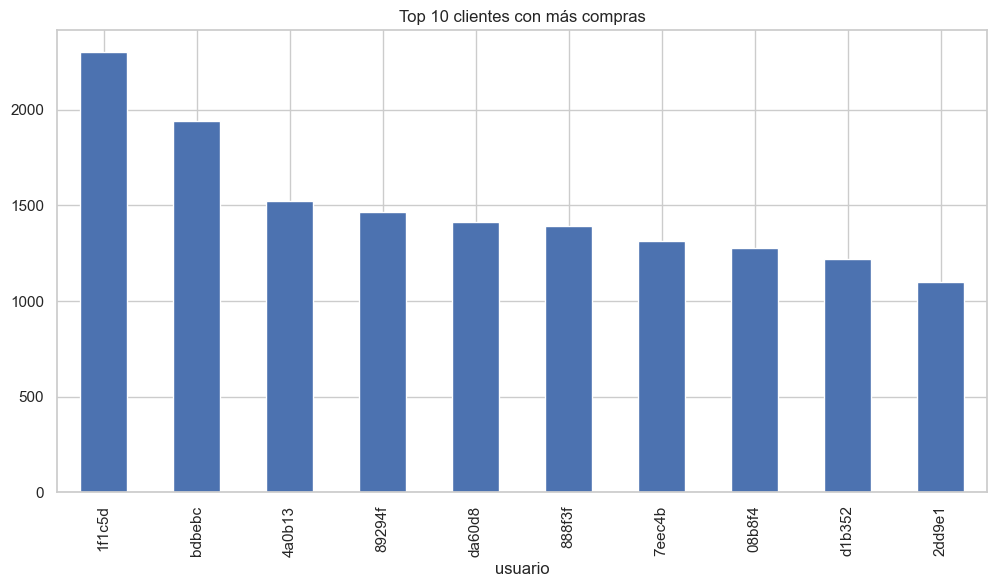

In [12]:
compras_por_cliente = df.groupby("usuario").size().sort_values(ascending=False)
compras_por_cliente.head(10).plot(kind="bar")
plt.title("Top 10 clientes con más compras")

Text(0.5, 1.0, 'Compras por semana')

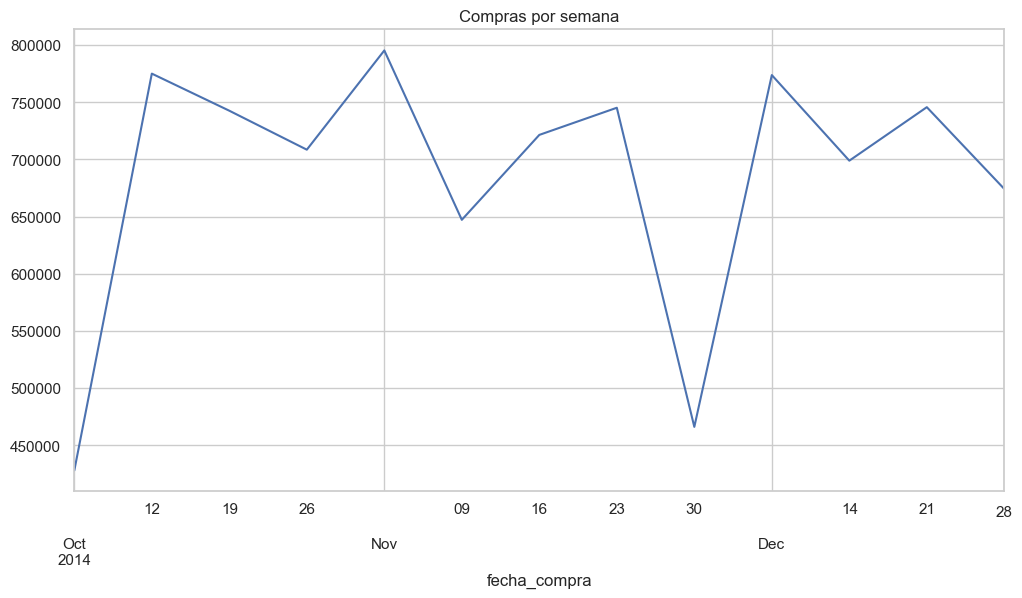

In [13]:
df.set_index("fecha_compra").resample("W").size().plot()
plt.title("Compras por semana")

Text(0.5, 1.0, 'Clientes recurrentes (compras >1 por mes)')

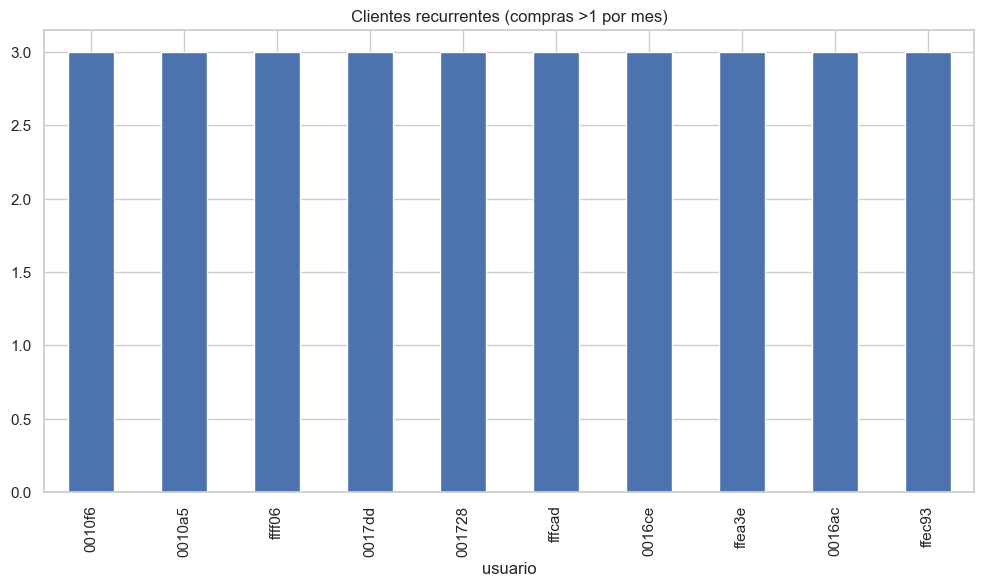

In [14]:
df["mes"] = df["fecha_compra"].dt.to_period("M")
compras_mensuales = df.groupby(["usuario", "mes"]).size().reset_index(name="compras_mes")
clientes_recurrentes = compras_mensuales[compras_mensuales["compras_mes"] > 1]
clientes_recurrentes["usuario"].value_counts().head(10).plot(kind="bar")
plt.title("Clientes recurrentes (compras >1 por mes)")

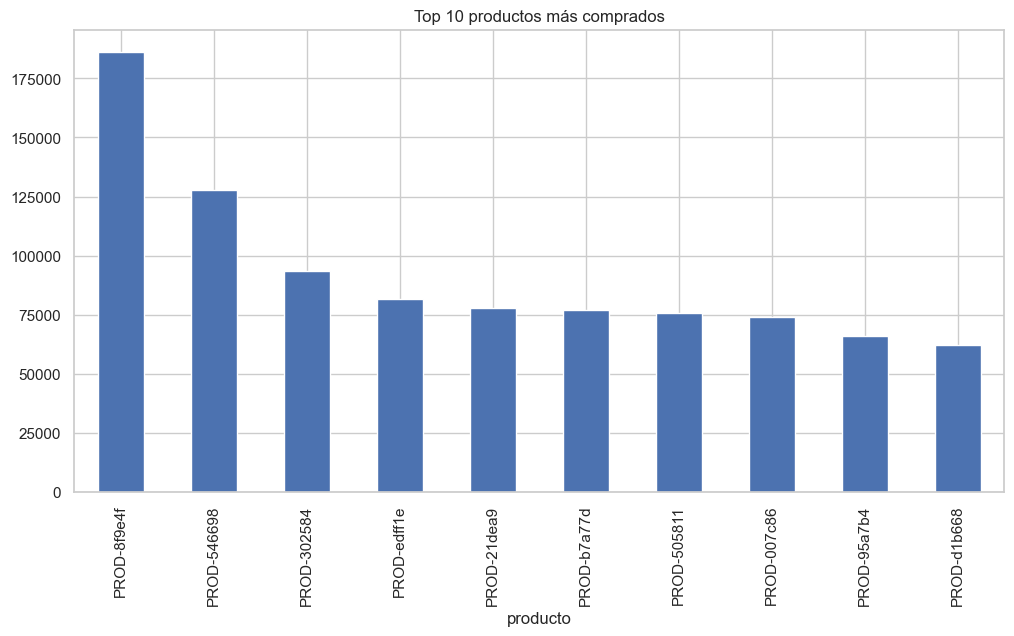

In [15]:
if "producto" in df.columns:
    df["producto"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 productos más comprados")